In [1]:
ls  ../dat -a

./           SED_o20.npy    dataall_save_k819-4.npy  line_o.npy    petest-p.dat
../          SED_p20.npy    dataall_save_o819.npy    petest-k.dat  petest.dat
SED_k20.npy  SED_star3.npy  dataall_save_p819-4.npy  petest-o.dat


In [1]:
import matplotlib.animation as animation
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec
#dataall=np.load('dataall_save.npy')
dataallo=np.load('../dat/dataall_save_o819.npy')#*1e-5#Myr=>yr
dataallk=np.load('../dat/dataall_save_k819-4.npy')#*1e-5
dataallp=np.load('../dat/dataall_save_p819-4.npy')#*1e-5
# ../analy/  anl-k4/  anl-p7/  anltest_o/

In [2]:
#timing(0-300) setting(000-111 * 3pe model)
tmyr=[]
setting=[]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1


MovieWriter stderr:
../fig/anime_all000_0606.mp4: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '../fig/anime_all000_0606.mp4']' returned non-zero exit status 1.

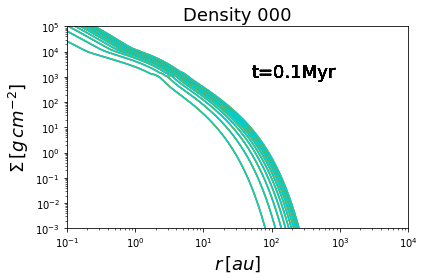

In [3]:
#au
box_size_xmin = 1e-1
box_size_xmax = 1e+4
box_size_ymin = 1e-3
box_size_ymax = 1e+05
rnorm=np.ones(20)
print (rnorm)
cmap=plt.get_cmap("cool")  
#PEs=["ow","pi","ko"]
#for pe in PEs:
#for cond in [3]:
#for pe in PEs:
for cond in range(8):
    cond3=format(cond, '03b')

    fig = plt.figure()
    print("1")
    class Init:
          def __init__(self, i):
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel(r'$r\,[au]$', fontsize=18)
            #plt.ylabel(r'$\.{\Sigma} \, [g\,cm^{-2}\,yr^{-1}]$', fontsize=18)
            plt.ylabel(r'$\Sigma \, [g\,cm^{-2}]$', fontsize=18)
            plt.xlim(box_size_xmin, box_size_xmax)
            plt.ylim(box_size_ymin, box_size_ymax)
            plt.title('Density '+cond3, fontsize=18)    
            plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
            mpl.rcParams['axes.xmargin'] = 0
            mpl.rcParams['axes.ymargin'] = 0
            plt.tight_layout()

    def updata(i):
                plt.cla()
                #for j in [9]:#M1.0
                for j in range(10):#all
                    k=j+1+(cond*10)
                    pltdato=dataallo[:,:,k]
                    pltdatk=dataallk[:,:,k]
                    pltdatp=dataallp[:,:,k]
                    Init(i)
                    x = []
                    y = []
                    yo = []
                    yk = []
                    yp = []
                    x.extend(pltdato[:,0])
                    yo.extend((pltdato[:,i+1]))
                    yk.extend((pltdatk[:,i+1]))
                    yp.extend((pltdatp[:,i+1])) 
                    #print(x[0],yp[100])

                    plt.plot(x, yo,c="g")
                    plt.plot(x, yk,c="orange")
                    plt.plot(x, yp,c="darkturquoise")

                

    ani = animation.FuncAnimation(fig, updata, interval=100, frames=300)
    ani.save("../fig/anime_all"+cond3+"_0606.mp4", writer="ffmpeg")
    print("2")

In [ ]:
#au
box_size_xmin = 1e-1
box_size_xmax = 1e+4
box_size_ymin = 1e-3
box_size_ymax = 1e+05
rnorm=np.ones(20)
print (rnorm)
cmap=plt.get_cmap("cool")  
#PEs=["ow","pi","ko"]
#for pe in PEs:
#for cond in [3]:
#for pe in PEs:
class Init:
          def __init__(self, i):
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel(r'$r\,[au]$', fontsize=18)
            #plt.ylabel(r'$\.{\Sigma} \, [g\,cm^{-2}\,yr^{-1}]$', fontsize=18)
            plt.ylabel(r'$\Sigma \, [g\,cm^{-2}]$', fontsize=18)
            plt.xlim(box_size_xmin, box_size_xmax)
            plt.ylim(box_size_ymin, box_size_ymax)
            plt.title('Density '+cond3, fontsize=18)    
            plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
            mpl.rcParams['axes.xmargin'] = 0
            mpl.rcParams['axes.ymargin'] = 0
            plt.tight_layout()
fig = plt.figure()
for cond in range(8):
    cond3=format(cond, '03b')

    print("1")

    for i in range(300):
                for j in [0]:#M1.0
                #for j in [9]:#M1.0
                #for j in range(10):#all
                    k=j+1+(cond*10)
                    pltdato=dataallo[:,:,k]
                    pltdatk=dataallk[:,:,k]
                    pltdatp=dataallp[:,:,k]
                    Init(i)
                    x = []
                    y = []
                    yo = []
                    yk = []
                    yp = []
                    x.extend(pltdato[:,0])
                    yo.extend((pltdato[:,i+1]))
                    yk.extend((pltdatk[:,i+1]))
                    yp.extend((pltdatp[:,i+1])) 
                    #print(x[0],yp[100])
                    if (i==97 and cond==2)or(i==20 and cond==4)or(i==15 and cond==6):
                        plt.plot(x, yo,c="g")
                    #if (i==97 and cond==2):
                        #plt.plot(x, yk,c="orange")|
                    if (i==58 and cond==2):
                        plt.plot(x, yp,c="darkturquoise")
plt.show()

                

    #ani = animation.FuncAnimation(fig, updata, interval=100, frames=300)
    #ani.save("../fig/anime_all"+cond3+"_0120.mp4", writer="ffmpeg")
    #print("2")

In [ ]:
#au
box_size_xmin = 1e-1
box_size_xmax = 1e+4
box_size_ymin = 1e-3
box_size_ymax = 1e+05
rnorm=np.ones(20)
print (rnorm)
cmap=plt.get_cmap("cool")  
#PEs=["ow","pi","ko"]
#for pe in PEs:
#for cond in [3]:
#for pe in PEs:
class Init:
          def __init__(self, i):
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel(r'$r\,[au]$', fontsize=18)
            #plt.ylabel(r'$\.{\Sigma} \, [g\,cm^{-2}\,yr^{-1}]$', fontsize=18)
            plt.ylabel(r'$\Sigma \, [g\,cm^{-2}]$', fontsize=18)
            plt.xlim(box_size_xmin, box_size_xmax)
            plt.ylim(box_size_ymin, box_size_ymax)
            plt.title('Density '+cond3, fontsize=18)    
            plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
            mpl.rcParams['axes.xmargin'] = 0
            mpl.rcParams['axes.ymargin'] = 0
            plt.tight_layout()
fig = plt.figure()
for cond in range(8):
    cond3=format(cond, '03b')

    print("1")

    for i in range(300):
                for j in [0]:#M０．１
                #for j in [9]:#M1.0
                #for j in range(10):#all
                    k=j+1+(cond*10)
                    pltdato=dataallo[:,:,k]
                    pltdatk=dataallk[:,:,k]
                    pltdatp=dataallp[:,:,k]
                    Init(i)
                    x = []
                    y = []
                    yo = []
                    yk = []
                    yp = []
                    x.extend(pltdato[:,0])
                    yo.extend((pltdato[:,i+1]))
                    yk.extend((pltdatk[:,i+1]))
                    yp.extend((pltdatp[:,i+1])) 
                    #print(x[0],yp[100])
                    if (i==97 and cond==2)or(i==20 and cond==4)or(i==15 and cond==6):
                        plt.plot(x, yo,c="g", "-")
                    #if (i==97 and cond==2):
                        #plt.plot(x, yk,c="orange", "-")
                    if (i==58 and cond==2):
                        plt.plot(x, yp,c="darkturquoise", "-")
                    if (i==199 and cond==2)or(i==41 and cond==4)or(i==30 and cond==6):
                        plt.plot(x, yo,c="g")
                    #if (i==97 and cond==2):
                        #plt.plot(x, yk,c="orange")
                    if (i==117 and cond==2):
                        plt.plot(x, yp,c="darkturquoise")
plt.show()

                

    #ani = animation.FuncAnimation(fig, updata, interval=100, frames=300)
    #ani.save("../fig/anime_all"+cond3+"_0120.mp4", writer="ffmpeg")
    #print("2")

In [ ]:
#au
box_size_xmin = 1e-1
box_size_xmax = 1e+4
box_size_ymin = 1e-3
box_size_ymax = 1e+05
rnorm=np.ones(20)
print (rnorm)
cmap=plt.get_cmap("cool")  
#PEs=["ow","pi","ko"]
#for pe in PEs:
#for cond in [3]:
#for pe in PEs:
class Init:
          def __init__(self, i):
            plt.xscale('log')
            plt.yscale('log')
            plt.xlabel(r'$r\,[au]$', fontsize=18)
            #plt.ylabel(r'$\.{\Sigma} \, [g\,cm^{-2}\,yr^{-1}]$', fontsize=18)
            plt.ylabel(r'$\Sigma \, [g\,cm^{-2}]$', fontsize=18)
            plt.xlim(box_size_xmin, box_size_xmax)
            plt.ylim(box_size_ymin, box_size_ymax)
            plt.title('Density '+cond3, fontsize=18)    
            plt.text(50, 1000, "t=%.1f"%(i*0.1)+"Myr", fontsize=18)
            mpl.rcParams['axes.xmargin'] = 0
            mpl.rcParams['axes.ymargin'] = 0
            plt.tight_layout()
fig = plt.figure()
for cond in range(8):
    cond3=format(cond, '03b')

    print("1")

    for i in range(300):
                #for j in [0]:#M０．１
                for j in [9]:#M1.0
                #for j in range(10):#all
                    k=j+1+(cond*10)
                    pltdato=dataallo[:,:,k]
                    pltdatk=dataallk[:,:,k]
                    pltdatp=dataallp[:,:,k]
                    Init(i)
                    x = []
                    y = []
                    yo = []
                    yk = []
                    yp = []
                    x.extend(pltdato[:,0])
                    yo.extend((pltdato[:,i+1]))
                    yk.extend((pltdatk[:,i+1]))
                    yp.extend((pltdatp[:,i+1])) 
                    #print(x[0],yp[100])
                    if (i==86 and cond==2)or(i==54 and cond==4)or(i==16 and cond==6):
                        plt.plot(x, yo,c="g", "-")
                    if (i==102 and cond==2):
                        plt.plot(x, yk,c="orange", "-")
                    if (i==80 and cond==2):
                        plt.plot(x, yp,c="darkturquoise", "-")
                    if (i==172 and cond==2)or(i==108 and cond==4)or(i==32 and cond==6):
                        plt.plot(x, yo,c="g")
                    if (i==204 and cond==2):
                        plt.plot(x, yk,c="orange")
                    if (i==161 and cond==2):
                        plt.plot(x, yp,c="darkturquoise")
plt.show()

                

    #ani = animation.FuncAnimation(fig, updata, interval=100, frames=300)
    #ani.save("../fig/anime_all"+cond3+"_0120.mp4", writer="ffmpeg")
    #print("2")